# 🔧 Tutorial
#### This notebook demonstrates barcode aggregation and feature concatenation using sample data.

### 📦 Imports Packages

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from persistent_diagrams import compute_pds
import vectorization as vec

### 📊 Load Sample Data

In [204]:
ct_image = np.load('sample_data/sample_proc_ct_image.npy')

##### Visualize the sample

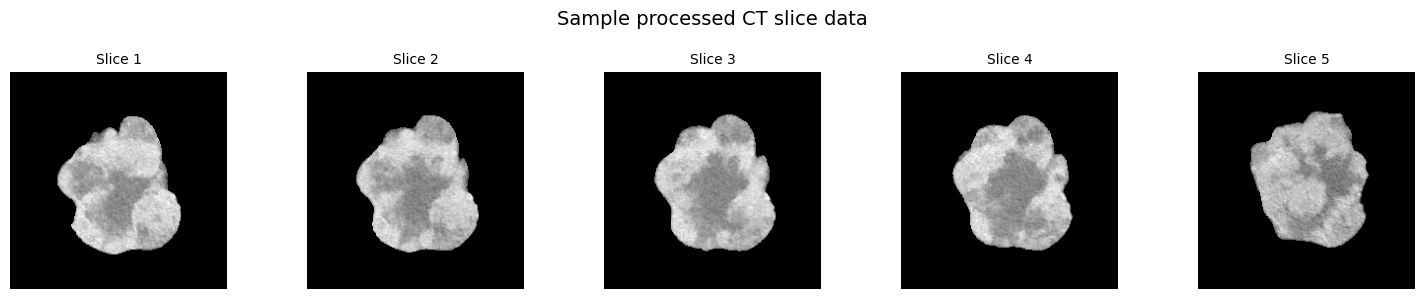

In [205]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
fig.suptitle("Sample processed CT slice data", fontsize=14)

for i in range(5):
    ax = axes[i]
    if i < ct_image.shape[0]:
        win_center = 40
        win_width = 350
        lower = win_center - (win_width / 2)
        upper = win_center + (win_width / 2)
        windowed_slice = np.clip(ct_image[i], lower, upper)
        windowed_slice = (windowed_slice - lower) / (upper - lower)

        ax.imshow(windowed_slice, cmap='gray')
        ax.set_title(f"Slice {i+1}", fontsize=10)
        ax.axis('off')
    else:
        ax.remove()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 🧵 Compute Persistence Diagrams

In [ ]:
# Computing persistence diagrams for each slice of 
# the 3D image using cubical complex filtration

pers_dgs = {}

for i, slice_data in enumerate(ct_image):
    pers_diagram = compute_pds(slice_data, max_dim=1)
    pers_dgs[f'slice_{i}'] = pers_diagram

##### Visualize sample persistence barcodes

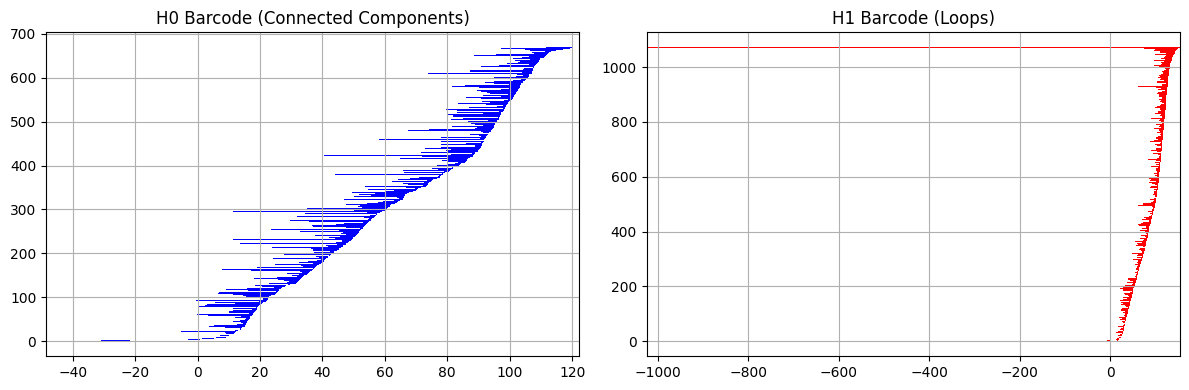

In [207]:
# Extract persistence intervals
ph_0, ph_1 = pers_dgs['slice_0']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# H0 barcode
births_0 = ph_0[:, 0]
lengths_0 = ph_0[:, 1] - ph_0[:, 0]
axes[0].barh(np.arange(len(births_0)), lengths_0, left=births_0, color='blue', height=1)
axes[0].set_title("H0 Barcode (Connected Components)")
axes[0].set_xlim([births_0.min(), ph_0[:, 1].max()])
axes[0].grid(True)

# H1 barcode
births_1 = ph_1[:, 0]
lengths_1 = ph_1[:, 1] - ph_1[:, 0]
axes[1].barh(np.arange(len(births_1)), lengths_1, left=births_1, color='red', height=2)
axes[1].set_title("H1 Barcode (Loops)")
axes[1].set_xlim([births_1.min(), ph_1[:, 1].max()])
axes[1].grid(True)

plt.tight_layout()
plt.show()


### 📈 Barcode Aggregation

In [208]:
# aggr_pers_dgs[0] for H0, aggr_pers_dgs[1] for H1
aggr_pers_dgs = [[], []]

for dgs in pers_dgs.values():
    ph_0, ph_1 = dgs
    aggr_pers_dgs[0].append(ph_0)
    aggr_pers_dgs[1].append(ph_1)

aggr_pers_dgs[0] = np.vstack(aggr_pers_dgs[0])
aggr_pers_dgs[1] = np.vstack(aggr_pers_dgs[1])

In [ ]:
aggr_pers_dgs

[array([[-48.50213807, -39.06040939],
        [-22.91542289, -22.62153791],
        [-30.8536211 , -21.5519642 ],
        ...,
        [125.85429191, 128.10446462],
        [123.11648638, 132.32975534],
        [138.84999404, 143.84635783]]),
 array([[  -18.58626133,   -16.36438392],
        [  -16.57729444,   -13.06220853],
        [   -6.24326403,     3.00768739],
        ...,
        [  154.87464844,   168.10689457],
        [   50.68433769,   168.76909972],
        [-1024.        ,   188.68342465]])]

#### Visualize aggregated barcodes

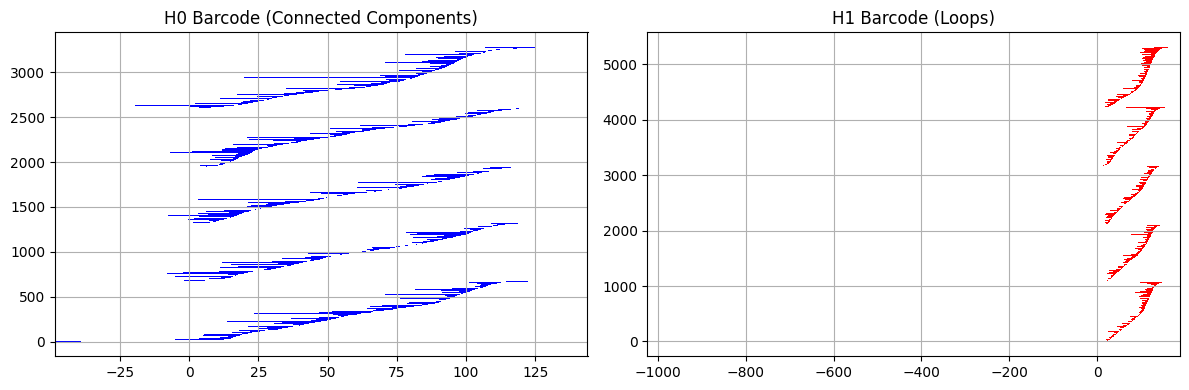

In [212]:
# Extract persistence intervals
ph_0, ph_1 = aggr_pers_dgs

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# H0 barcode
births_0 = ph_0[:, 0]
lengths_0 = ph_0[:, 1] - ph_0[:, 0]
axes[0].barh(np.arange(len(births_0)), lengths_0, left=births_0, color='blue', height=1)
axes[0].set_title("H0 Barcode (Connected Components)")
axes[0].set_xlim([births_0.min(), ph_0[:, 1].max()])
axes[0].grid(True)

# H1 barcode
births_1 = ph_1[:, 0]
lengths_1 = ph_1[:, 1] - ph_1[:, 0]
axes[1].barh(np.arange(len(births_1)), lengths_1, left=births_1, color='red', height=2)
axes[1].set_title("H1 Barcode (Loops)")
axes[1].set_xlim([births_1.min(), ph_1[:, 1].max()])
axes[1].grid(True)

plt.tight_layout()
plt.show()


#### Vectorize aggregated barcodes

##### Betti curve computation and visualization

In [ ]:
betti_curve_feature_ph0 = vec.GetBettiCurveFeature(aggr_pers_dgs[0])
betti_curve_feature_ph1 = vec.GetBettiCurveFeature(aggr_pers_dgs[1])

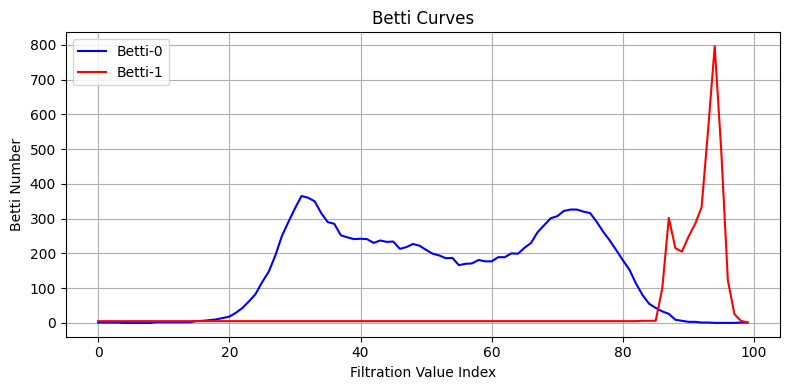

In [ ]:
x = np.arange(len(betti_curve_feature_ph0))

plt.figure(figsize=(8, 4))
plt.plot(x, betti_curve_feature_ph0, label='Betti-0', color='blue')
plt.plot(x, betti_curve_feature_ph1, label='Betti-1', color='red')
plt.title("Betti Curves")
plt.xlabel("Filtration Value Index")
plt.ylabel("Betti Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### Persistence landscapes computation and visualization

In [146]:
numLand = 5  # Number of landscapes
resolution = 100 

# Computing Persistent Landscapes features
PL_0 = vec.GetPersLandscapeFeature(aggr_pers_dgs[0], num=numLand, res=resolution)
PL_1 = vec.GetPersLandscapeFeature(aggr_pers_dgs[1], num=numLand, res=resolution)

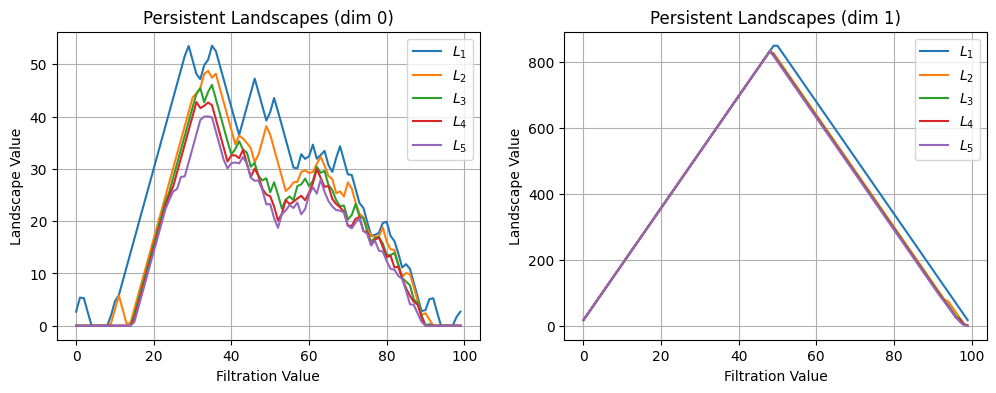

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i in range(numLand):
    axes[0].plot(PL_0[i*resolution:(i+1)*resolution], label=f'$L_{i+1}$')

# Customize the plot
axes[0].set_title('Persistent Landscapes (dim 0)')
axes[0].set_xlabel('Filtration Value')
axes[0].set_ylabel('Landscape Value')
axes[0].legend()
axes[0].grid(True)

for i in range(numLand):
    axes[1].plot(PL_1[i*resolution:(i+1)*resolution], label=f'$L_{i+1}$')

# Customize the plot
axes[1].set_title('Persistent Landscapes (dim 1)')
axes[1].set_xlabel('Filtration Value')
axes[1].set_ylabel('Landscape Value')
axes[1].legend()
axes[1].grid(True)

plt.show()

### 📈 Feature Concatenation

#### Betti curve features computation for barcodes of each slice

In [ ]:
# Betti curve vectorization per slice's barcodes

slice_features = {}

for slice_id, slice_pers_dgs in pers_dgs.items():
    betti_curve_feature_ph0 = vec.GetBettiCurveFeature(slice_pers_dgs[0])
    betti_curve_feature_ph1 = vec.GetBettiCurveFeature(slice_pers_dgs[1])
    slice_features[slice_id] = [betti_curve_feature_ph0, betti_curve_feature_ph1]

In [ ]:
# Concatenate betti curve features of all slices

aggr_betti_curve_0 = []
aggr_betti_curve_1 = []

for feature in slice_features.values():
    betti_0, betti_1 = feature
    aggr_betti_curve_0.append(betti_0)
    aggr_betti_curve_1.append(betti_1)

aggr_betti_curve_0 = np.hstack(aggr_betti_curve_0)
aggr_betti_curve_1 = np.hstack(aggr_betti_curve_1)

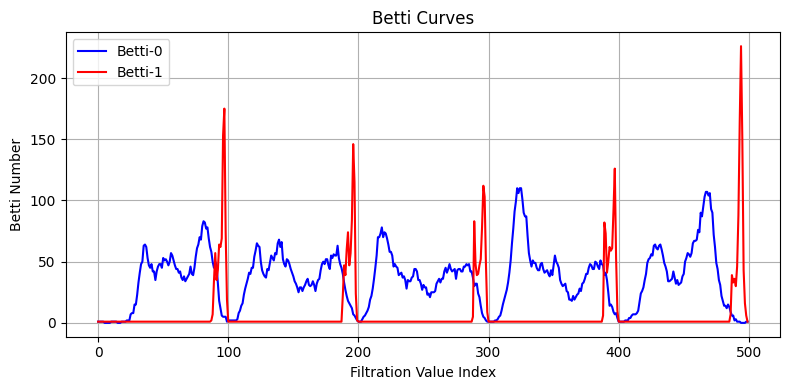

In [ ]:
# Visualizing concatenated betti curve features

x = np.arange(len(aggr_betti_curve_0))

plt.figure(figsize=(8, 4))
plt.plot(x, aggr_betti_curve_0, label='Betti-0', color='blue')
plt.plot(x, aggr_betti_curve_1, label='Betti-1', color='red')
plt.title("Betti Curves")
plt.xlabel("Filtration Value Index")
plt.ylabel("Betti Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Persistence landscapes features computation for barcodes of each slice

In [ ]:
# Persistence landscapes vectorization per slice's barcodes

numLand = 5  # Number of landscapes
resolution = 100 

slice_features = {}

for slice_id, slice_pers_dgs in pers_dgs.items():
    PL_0 = vec.GetPersLandscapeFeature(slice_pers_dgs[0], num=numLand, res=resolution)
    PL_1 = vec.GetPersLandscapeFeature(slice_pers_dgs[1], num=numLand, res=resolution)
    slice_features[slice_id] = [PL_0, PL_1]

In [ ]:
# Concatenate persistence landscapes features of all slices

aggr_PL_0 = []
aggr_PL_1 = []

for feature in slice_features.values():
    PL_0, PL_1 = feature
    aggr_PL_0.append(PL_0)
    aggr_PL_1.append(PL_1)

aggr_PL_0 = np.hstack(aggr_PL_0)
aggr_PL_1 = np.hstack(aggr_PL_1)

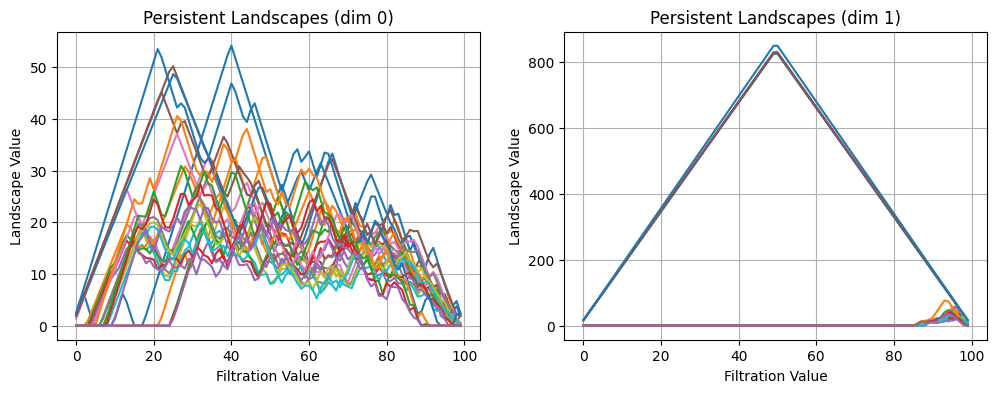

In [ ]:
# Visualizing concatenated persistence landscapes features

agg_numLand = numLand*len(slice_features)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i in range(agg_numLand):
    axes[0].plot(aggr_PL_0[i*resolution:(i+1)*resolution])

# Customize the plot
axes[0].set_title('Persistent Landscapes (dim 0)')
axes[0].set_xlabel('Filtration Value')
axes[0].set_ylabel('Landscape Value')
axes[0].grid(True)

for i in range(agg_numLand):
    axes[1].plot(aggr_PL_1[i*resolution:(i+1)*resolution])

# Customize the plot
axes[1].set_title('Persistent Landscapes (dim 1)')
axes[1].set_xlabel('Filtration Value')
axes[1].set_ylabel('Landscape Value')
axes[1].grid(True)

plt.show()